**Click on File and save a copy in Drive.**

*Here is our final task. We have to predict Indian GDP using past data.*

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown --id 1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZix

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZix 



In [4]:
#read csv from runtime using pd.read_csv
df=pd.read_csv('/content/Indian_GDP_1960-2016.csv')

In [5]:
#delete unnamed: 0 column if you incounter
df.drop("Unnamed: 0",axis=1)

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,2016,2294.80,138640,8.26
1,2015,2103.59,128480,8.00
2,2014,2039.13,125920,7.41
3,2013,1856.72,116000,6.39
4,2012,1827.64,115520,5.46
5,2011,1823.05,116640,5.24
6,2010,1675.62,108640,8.50
7,2009,1341.89,88160,7.86
8,2008,1198.90,79920,3.09
9,2007,1216.74,82240,7.66


In [6]:
#make column 'India GDP - Historical Data.1' as Y
Y=df['India GDP - Historical Data.1']
Y

0     2294.80
1     2103.59
2     2039.13
3     1856.72
4     1827.64
5     1823.05
6     1675.62
7     1341.89
8     1198.90
9     1216.74
10     940.26
11     820.38
12     709.15
13     607.70
14     514.94
15     485.44
16     468.39
17     458.82
18     421.35
19     415.87
20     392.90
21     360.28
22     327.28
23     279.30
24     288.21
25     270.11
26     320.98
27     296.04
28     296.59
29     279.03
30     248.99
31     232.51
32     212.16
33     218.26
34     200.72
35     193.49
36     186.33
37     152.99
38     137.30
39     121.49
40     102.72
41      98.47
42      99.53
43      85.52
44      71.46
45      67.35
46      62.42
47      58.45
48      53.09
49      50.13
50      45.87
51      59.55
52      56.48
53      48.42
54      42.16
55      39.23
56      37.03
Name: India GDP - Historical Data.1, dtype: float64

In [7]:
X = np.asarray(df['India GDP - Historical Data'].values.tolist())

In [8]:
X = X.reshape(-1,1)

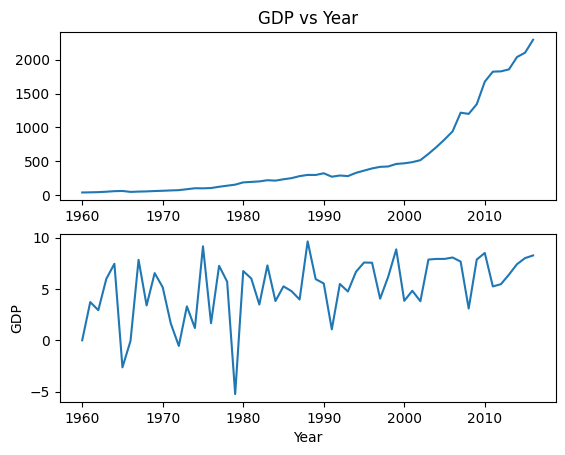

In [9]:
#make plot of GDP vs Year
plt.subplot(2,1,1)
plt.plot(X,df['India GDP - Historical Data.1'])
plt.title('GDP vs Year')
plt.subplot(2,1,2)
plt.plot(X,df['India GDP - Historical Data.3'])

plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

*To ensure that we don't exceed the limit while computing, we are subtracting 1959 from each year.*


In [10]:
for i in range(np.shape(X)[0]):
  X[i][0]=X[i][0]-1959

Make sure your Shape X=(57, 1) Y=(57,).

In [11]:
#print and check the shape
print(X.shape,Y.shape)

(57, 1) (57,)


To finish our final task, we will use Polynominal Regression.

**HINT:**

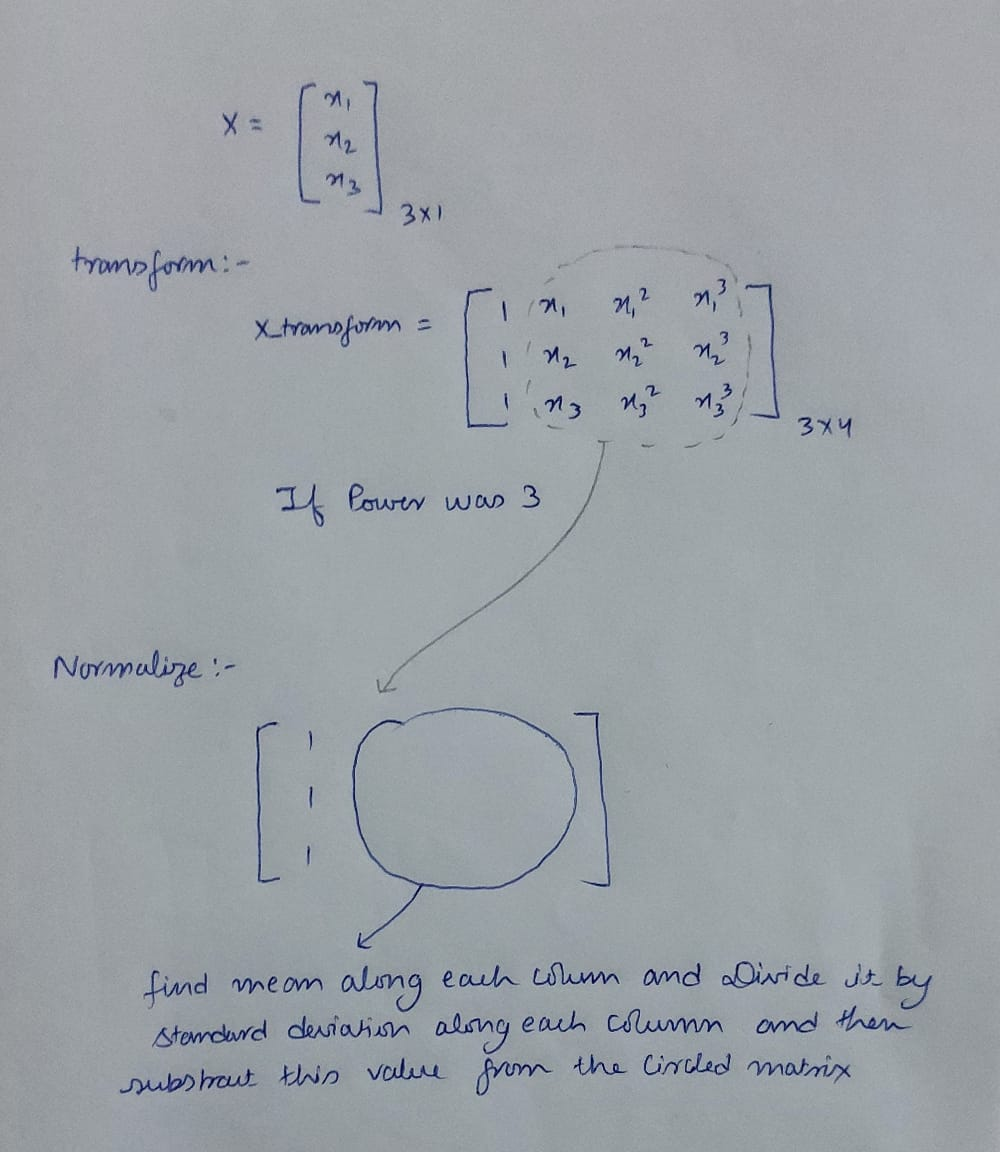

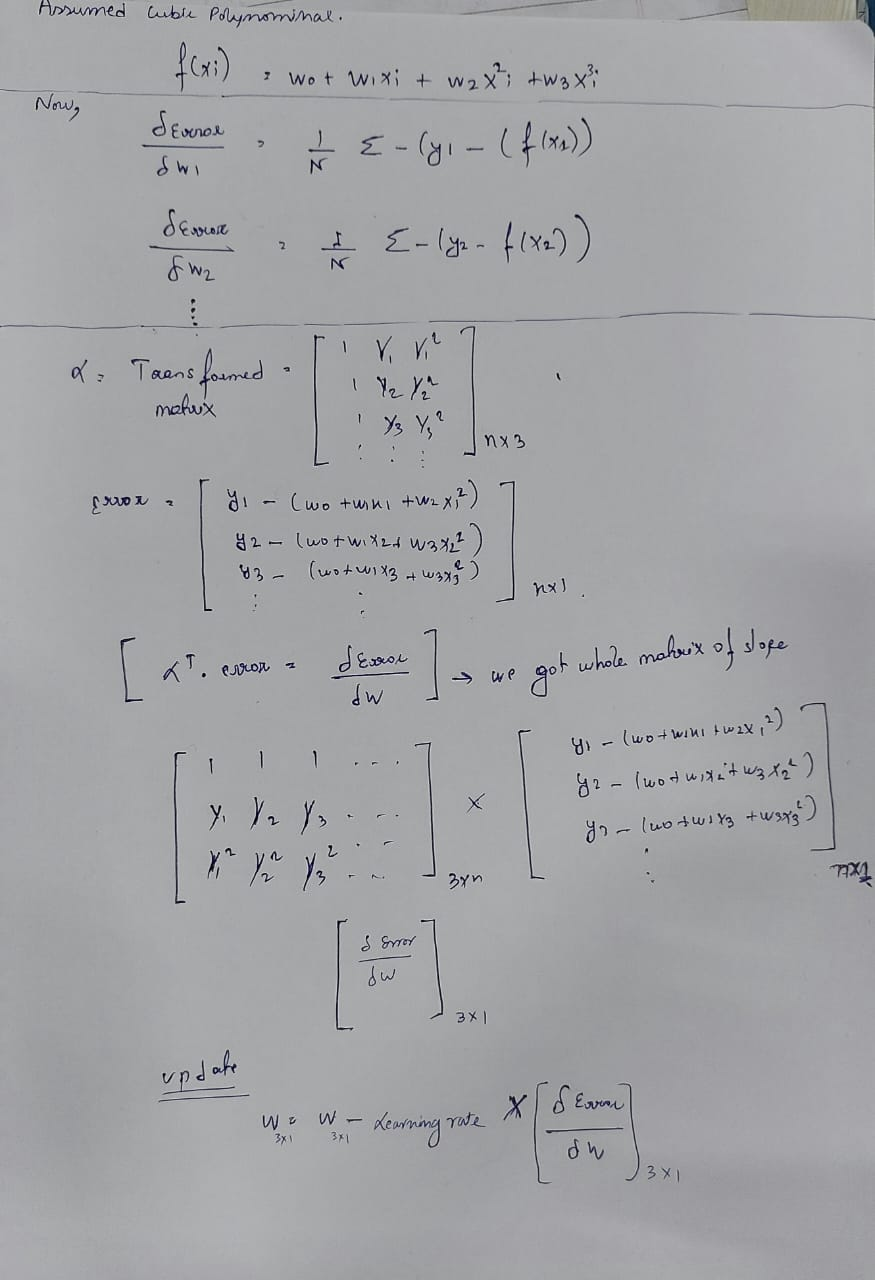

In [14]:
#Polynomial Regression

class PolynomialRegression :
    def __init__( self, degree=5, learning_rate=0.01, iterations=500 ) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # function to transform X
    def transform(self, X):
        X_transform = np.ones((self.m, 1))
        for j in range(self.degree + 1):
            if j != 0:
                x_pow = np.power(X, j)
                X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)

        return X_transform

    # function to normalize X_transform
    def normalize( self, X ) :
      X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
      return X

    # model training

    def fit( self, X, Y ) :
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        # weight initialization
        self.W = np.zeros( self.degree + 1 )

        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n using self.transform
        X_transform = self.transform( self.X )
        # normalize X_transform using self.normalize
        X_normalize = self.normalize(X_transform)

        # gradient descent learning
        for i in range( self.iterations ) :
            h = self.predict( self.X )
            error = h - self.Y
            # update weights (To Update Weights take a dot product of normalized X and errorp)
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
        return self.W

    # predict

    def predict( self, X ) :
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform )
        return np.dot( X_transform, self.W )




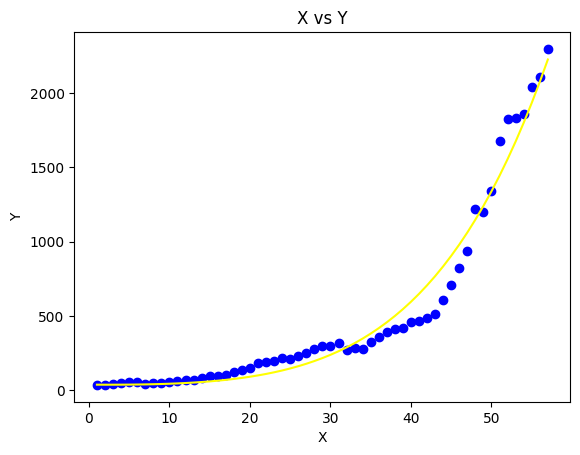

In [15]:
# Driver code
model = PolynomialRegression()
# Train model using model.fit and save weights
model = PolynomialRegression( degree = 5, learning_rate = 0.01, iterations = 500)
weights = model.fit( X, Y )
# Prediction on training set
Y_pred = model.predict( X )

# Visualization
#Scatter plot X,Y in blue colour
#line plot of X,Y_pred in yellow colour
plt.scatter(X,Y,color = "blue")
plt.plot(X,Y_pred,color = "yellow")
plt.title( 'X vs Y' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()





In [16]:
weights

array([510.88803483,  -6.22193595,  64.84873347, 130.93642297,
       185.80817203, 228.88809584])

In [17]:
!gdown --id 1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D
#https://drive.google.com/file/d/1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D 



In [20]:
#read fi_test from runtime using pd.read_csv
test=pd.read_csv('https://drive.google.com/uc?id=1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D')
from google.colab import drive
drive.mount('/content/drive')

In [21]:
X_test=test['India GDP - Historical Data']
X_test=np.array(X_test)
X_test = X_test.reshape(-1,1)
Y_test=test['India GDP - Historical Data.1']
Y_test=np.array(Y_test)

In [24]:
for i in range(np.shape(X_test)[0]):
  X_test[i][0]=X_test[i][0]-(1959)

ValueError: ignored

In [ ]:
#Predict GDP with X_test
gdp=model.predict(X_test)

In [ ]:
for i in range(5):
  print(X_test[i]+1959)
  print( "Actual ", Y_test[i] )
  print("Predicted", gdp[i])
  print("\n")

[2021]
Actual  3173.4
Predicted 2738.249543734258


[2020]
Actual  2667.69
Predicted 2586.3428069906813


[2019]
Actual  2831.55
Predicted 2442.251768372378


[2018]
Actual  2702.93
Predicted 2305.665067730035


[2017]
Actual  2651.47
Predicted 2176.2799460423093




[Please click on this link to access subjective questions](https://docs.google.com/document/d/1kagZcm2hhipJEHFh3cIgXGg9hhG6Hol6Fs6wAIHSMsk/edit?usp=sharing)